# Import packge

In [1]:
# management
import glob
import warnings
warnings.filterwarnings('ignore')

# data analysis
import numpy as np
import xarray as xr
import dask
dask.config.set({"array.slicing.split_large_chunks": False})
from scipy import stats

# plot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
import cartopy.crs as ccrs
plt.rcParams['pcolor.shading'] = 'auto'
mpl.rc('font', family='Times New Roman', size=10)
plt.rcParams.update({"mathtext.fontset": "stix"})

# self defined
from a00_basic_analysis.b_module.mapplot import (
    framework_plot1,
    hemisphere_plot,
)

from a00_basic_analysis.b_module.basic_calculations import (
    mon_sea_ann_average,
)


# Annual pre in HadGEM3-GC31-LL, historical, r1i1p1f3

In [2]:
# Import data
top_dir = '/badc/cmip6/data/CMIP6/'
mip = 'CMIP/'
institute = 'MOHC/'
source = 'HadGEM3-GC31-LL/'
experiment = 'historical/'
member = 'r1i1p1f3/'
table = 'Amon/'
variable = 'pr/'
grid = 'gn/'
version = 'v20190624/'

# pr, Precipitation, [kg m-2 s-1]
pr_hg3_ll_hi_r1_fl = np.array(sorted(glob.glob(
    top_dir + mip + institute + source + experiment + member +
    table + variable + grid + version + '*.nc',
    )))

pr_hg3_ll_hi_r1 = xr.open_mfdataset(
    pr_hg3_ll_hi_r1_fl, data_vars='minimal',
    coords='minimal', compat='override',
    )

am_pr_hg3_ll_hi_r1 = pr_hg3_ll_hi_r1.sel(time=slice(
    '1979-01-01', '2014-12-30')).pr.mean(axis=0) * 365 * 24 * 3600
# stats.describe(am_pr_hg3_ll_hi_r1, axis = None)

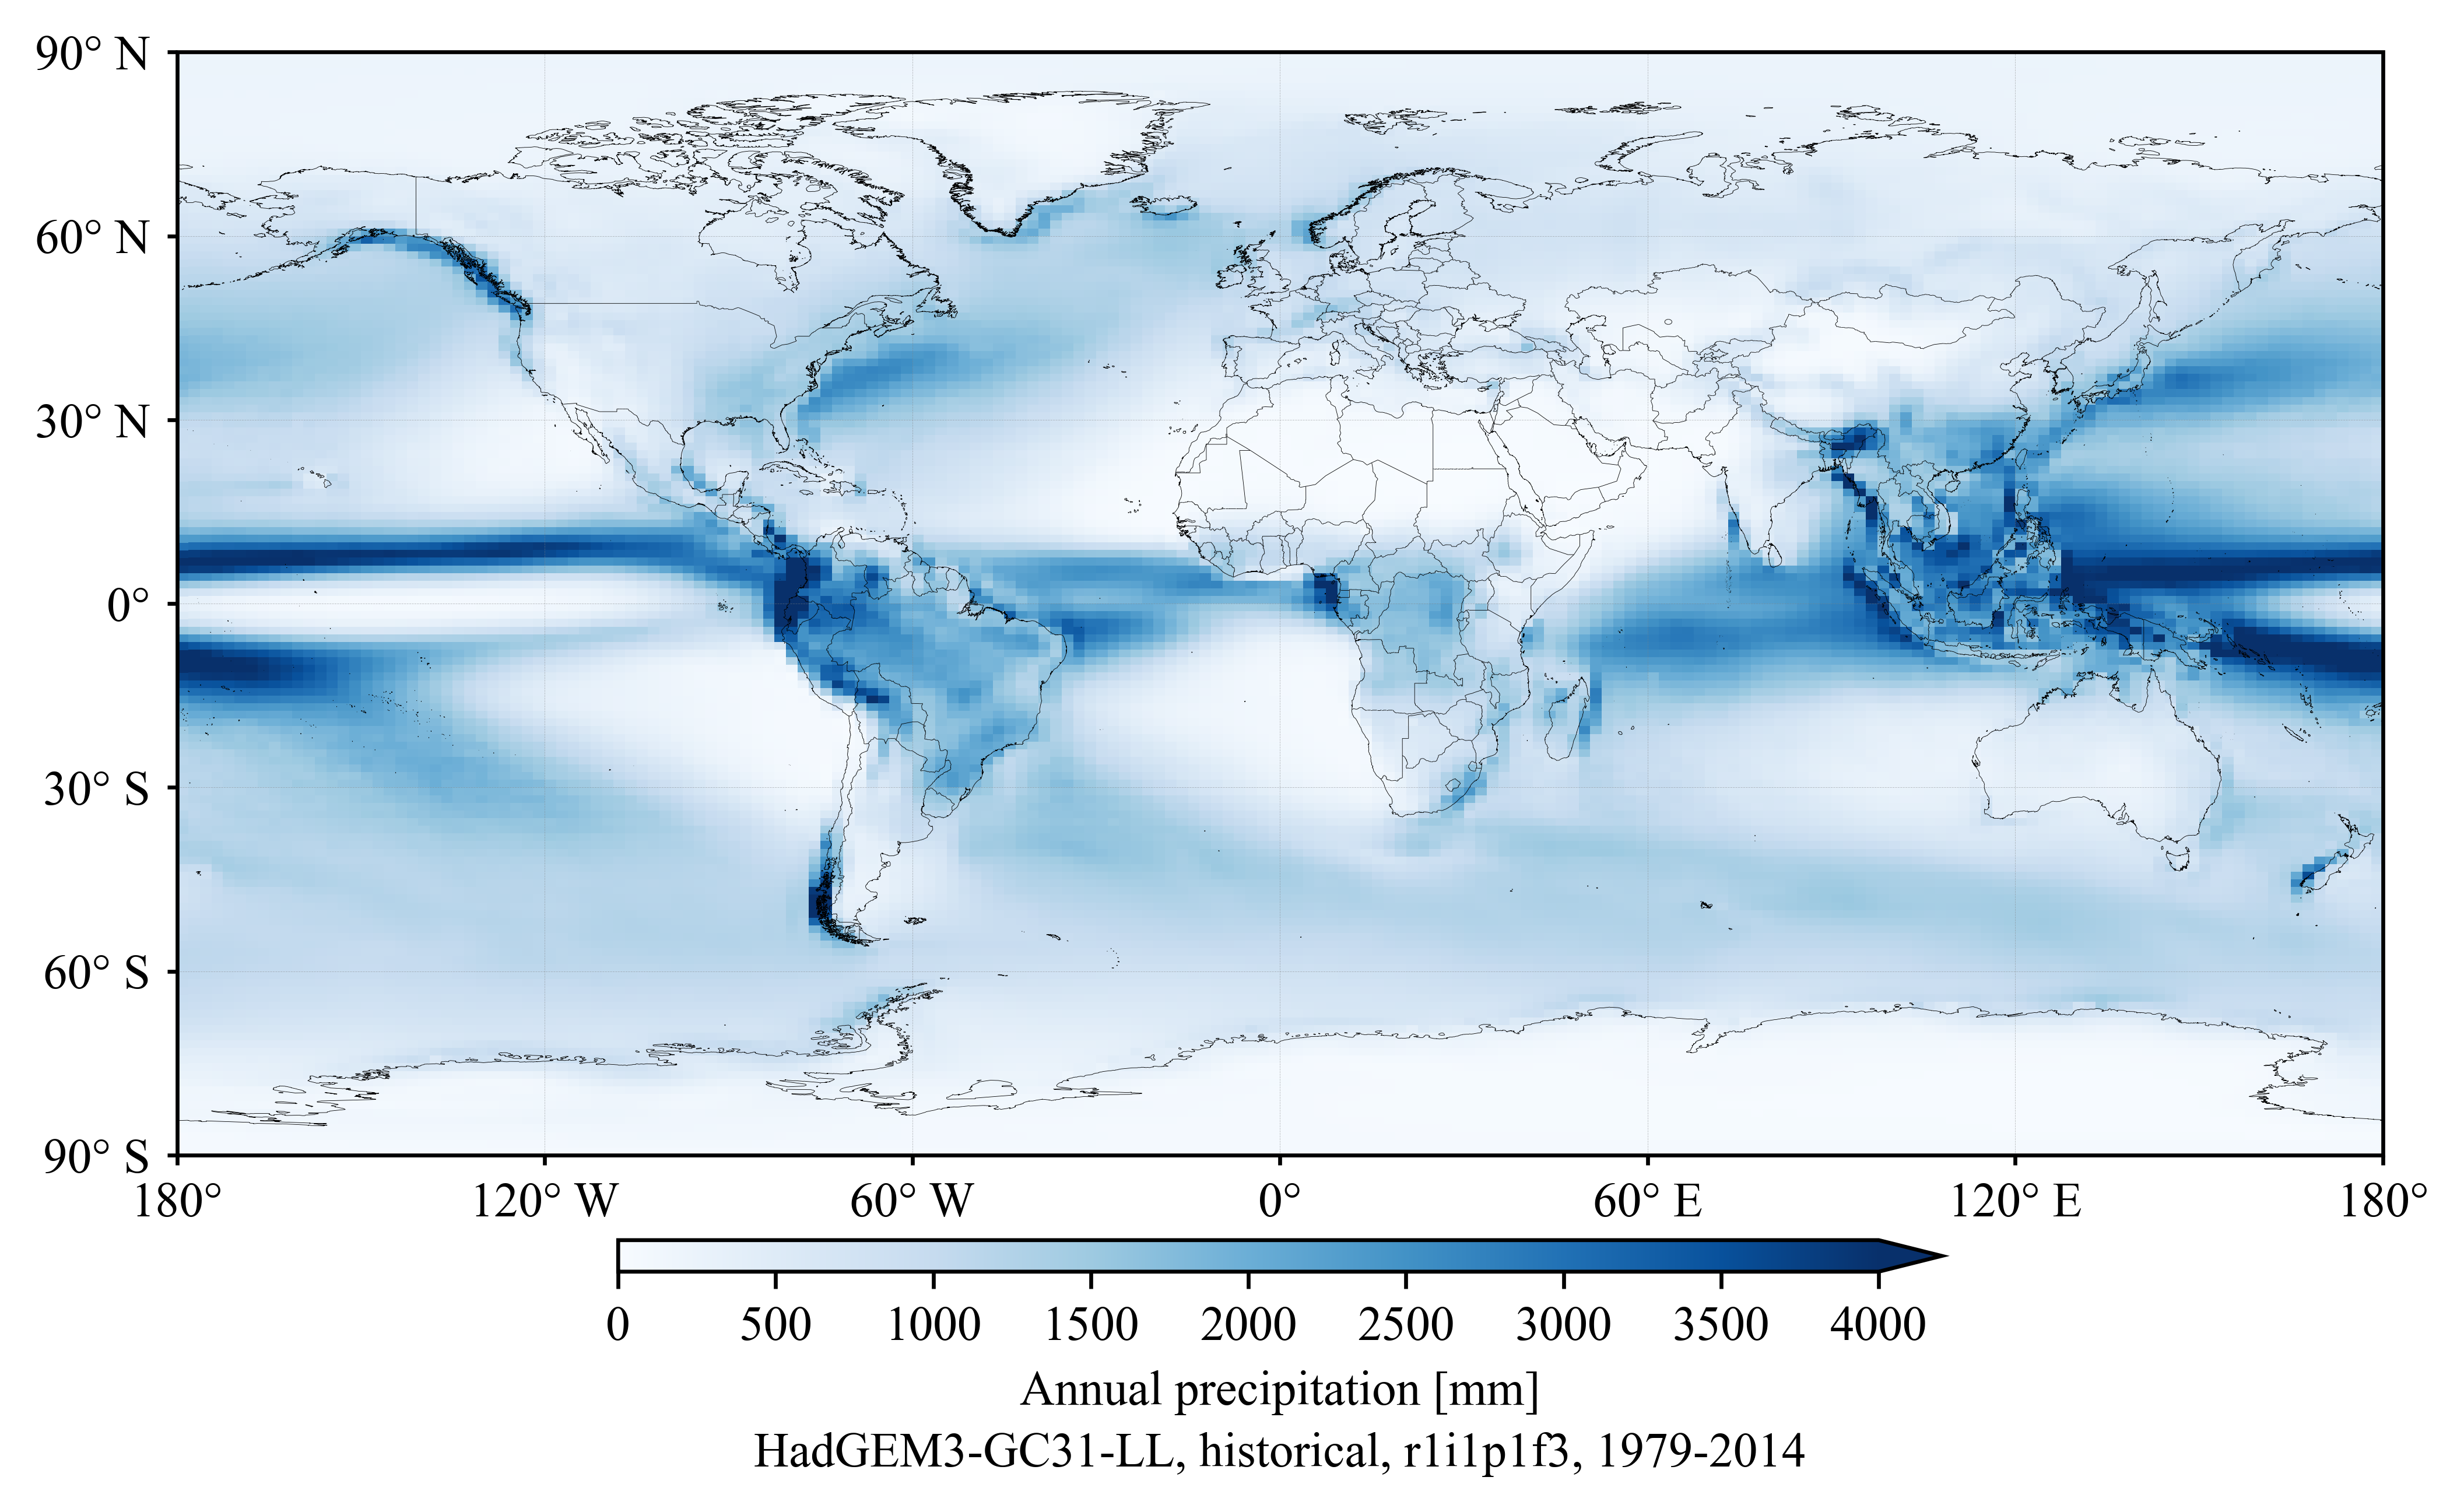

In [3]:
# Global map
pltlevel = np.arange(0, 4000.01, 2)
pltticks = np.arange(0, 4000.01, 500)

fig, ax = framework_plot1("global", figsize=np.array([8.8*2, 11]) / 2.54)
plt_cmp = ax.pcolormesh(
    pr_hg3_ll_hi_r1.lon,
    pr_hg3_ll_hi_r1.lat,
    am_pr_hg3_ll_hi_r1,
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),
)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.06,
    fraction=0.09, shrink=0.6, aspect=40, anchor=(0.5, -0.6),
    ticks=pltticks, extend='max')
cbar.ax.set_xlabel(
    'Annual precipitation [mm]\n%s, %s, %s, 1979-2014' %
    (source[:-1], experiment[:-1], member[:-1]), linespacing = 1.5
    )
fig.subplots_adjust(left=0.06, right=0.97, bottom=0.06, top=0.995)


Text(0.5, 0, 'Annual precipitation [mm]\nHadGEM3-GC31-LL, historical, r1i1p1f3, 1979-2014')

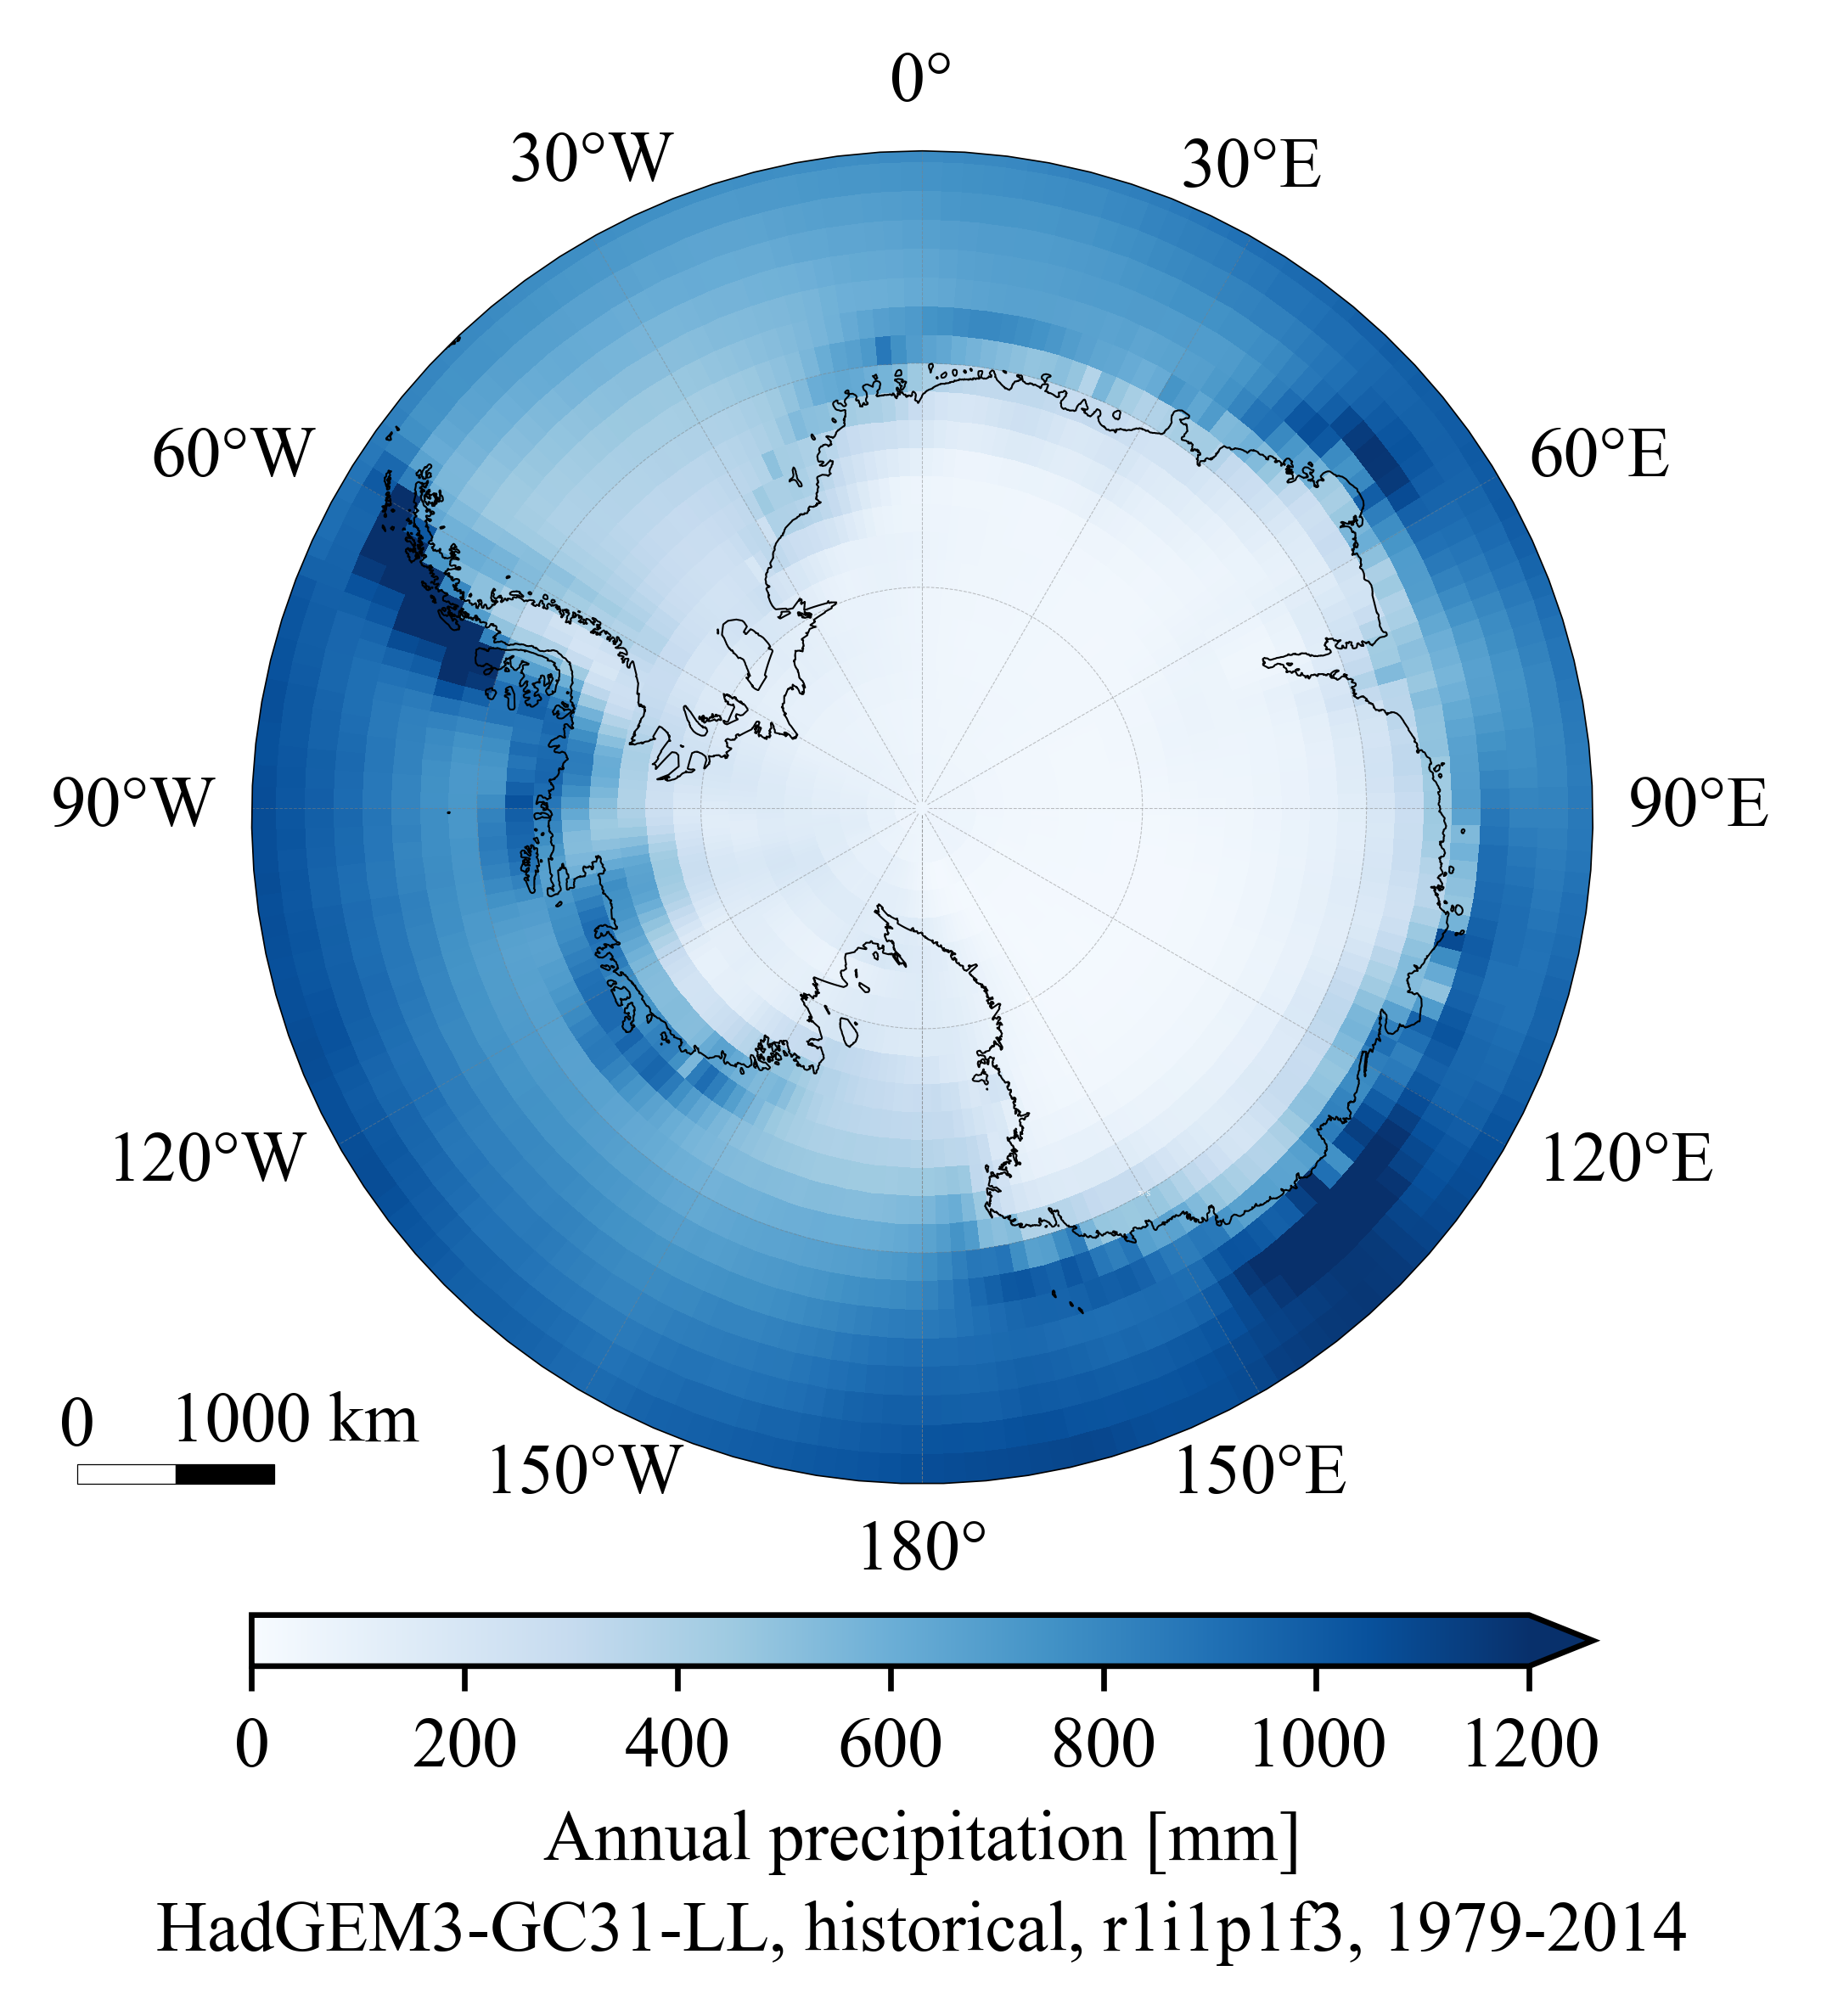

In [4]:
# SH map
pltlevel_sh = np.arange(0, 1200.01, 1)
pltticks_sh = np.arange(0, 1200.01, 200)
fig, ax = hemisphere_plot(northextent=-60, sb_length=1000, sb_barheight=100,)

plt_cmp = ax.pcolormesh(
    pr_hg3_ll_hi_r1.lon,
    pr_hg3_ll_hi_r1.lat,
    am_pr_hg3_ll_hi_r1,
    norm=BoundaryNorm(pltlevel_sh, ncolors=len(pltlevel_sh), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel_sh)), rasterized=True,
    transform=ccrs.PlateCarree(),
)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08,
    fraction=0.07, shrink=1, aspect=25, anchor=(0.5, 1), panchor=(0.5, 0),
    ticks=pltticks_sh, extend='max')
cbar.ax.set_xlabel(
    'Annual precipitation [mm]\n%s, %s, %s, 1979-2014' %
    (source[:-1], experiment[:-1], member[:-1]), linespacing=1.5
)

# Annual pre in ERA5

In [5]:
# import data
era5_mon_sl_79_21_pre = xr.open_dataset(
    'bas_palaeoclim_qino/observations/reanalysis/ERA5/mon_sl_79_present/era5_mon_sl_79_21_pre.nc')

pre = xr.concat((
    era5_mon_sl_79_21_pre.tp[:-2, 0, :, :],
    era5_mon_sl_79_21_pre.tp[-2:, 1, :, :]), dim='time') * 1000

# mm/year
pre_ann_average = mon_sea_ann_average(
    pre.sel(time=slice('1979-01-01', '2014-12-30')), 'time.year')
pre_ann_sum = pre_ann_average * 365

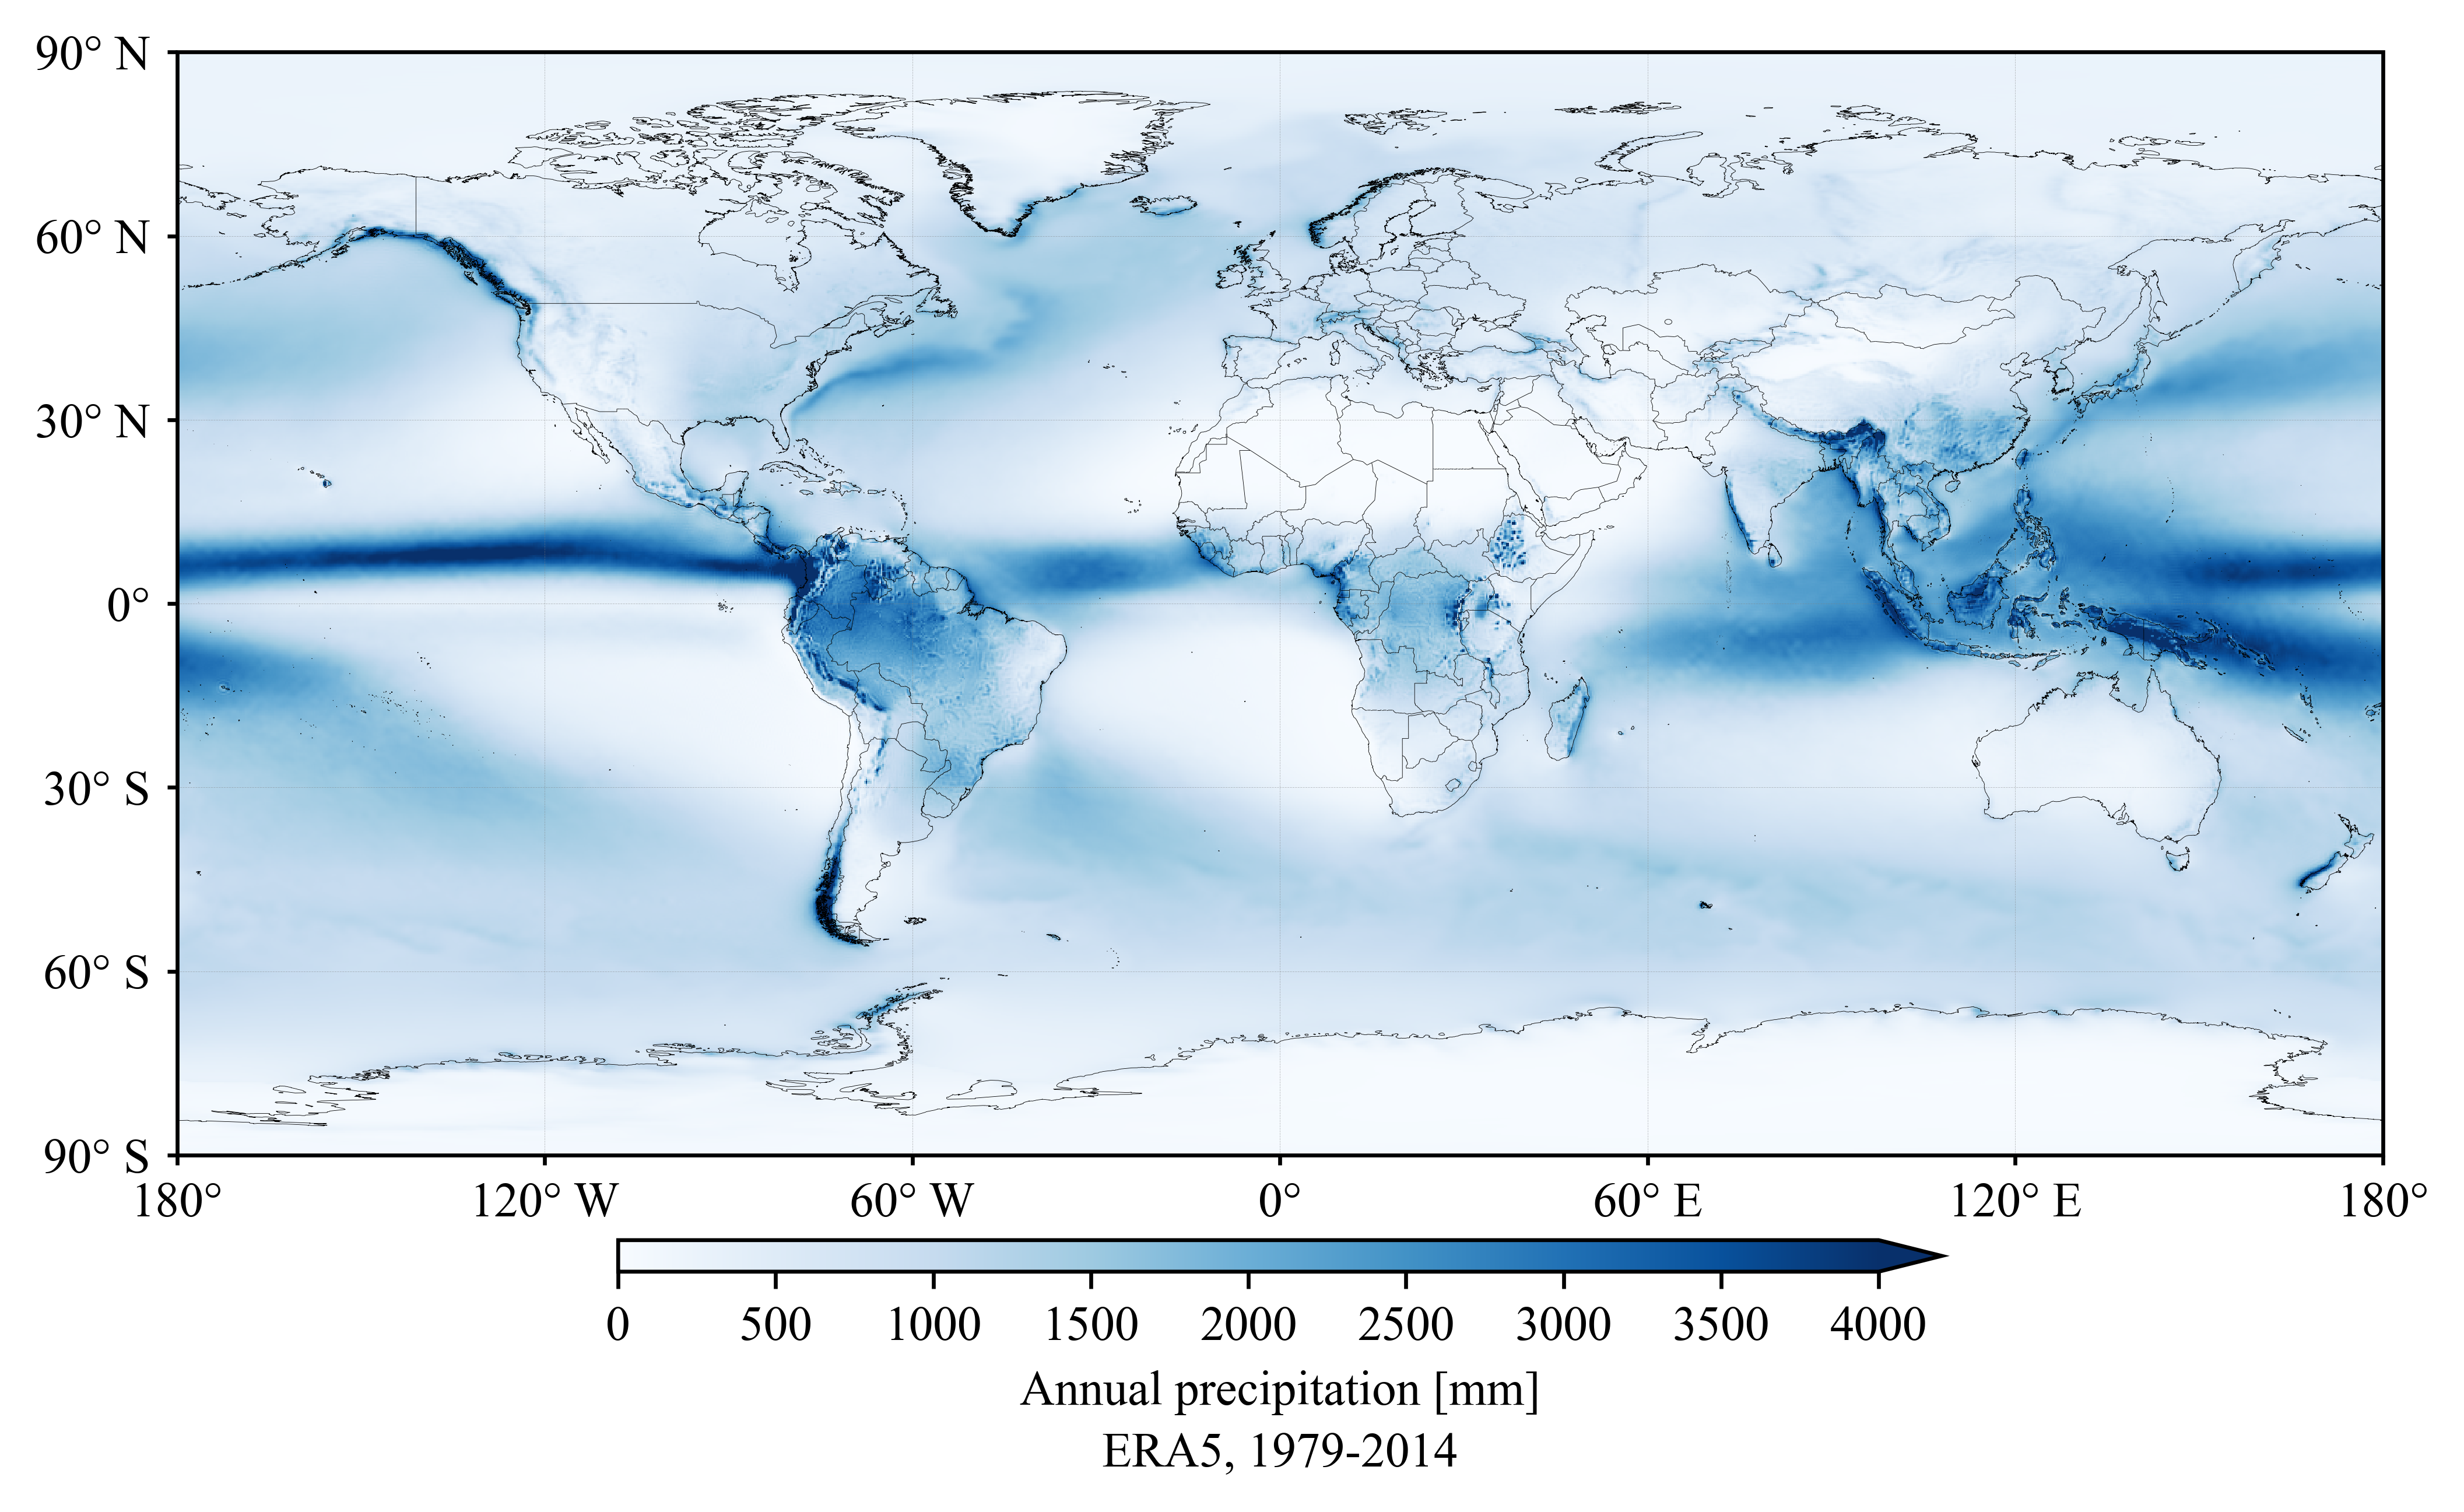

In [6]:
# Global map
pltlevel = np.arange(0, 4000.01, 2)
pltticks = np.arange(0, 4000.01, 500)

fig, ax = framework_plot1("global", figsize=np.array([8.8*2, 11]) / 2.54)
plt_cmp = ax.pcolormesh(
    era5_mon_sl_79_21_pre.longitude,
    era5_mon_sl_79_21_pre.latitude,
    pre_ann_sum[:-1, :, :].mean(axis=0),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),
)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.06,
    fraction=0.09, shrink=0.6, aspect=40, anchor=(0.5, -0.6),
    ticks=pltticks, extend='max')
cbar.ax.set_xlabel(
    'Annual precipitation [mm]\nERA5, 1979-2014', linespacing=1.5
)
fig.subplots_adjust(left=0.06, right=0.97, bottom=0.06, top=0.995)


Text(0.5, 0, 'Annual precipitation [mm]\nERA5, 1979-2014')

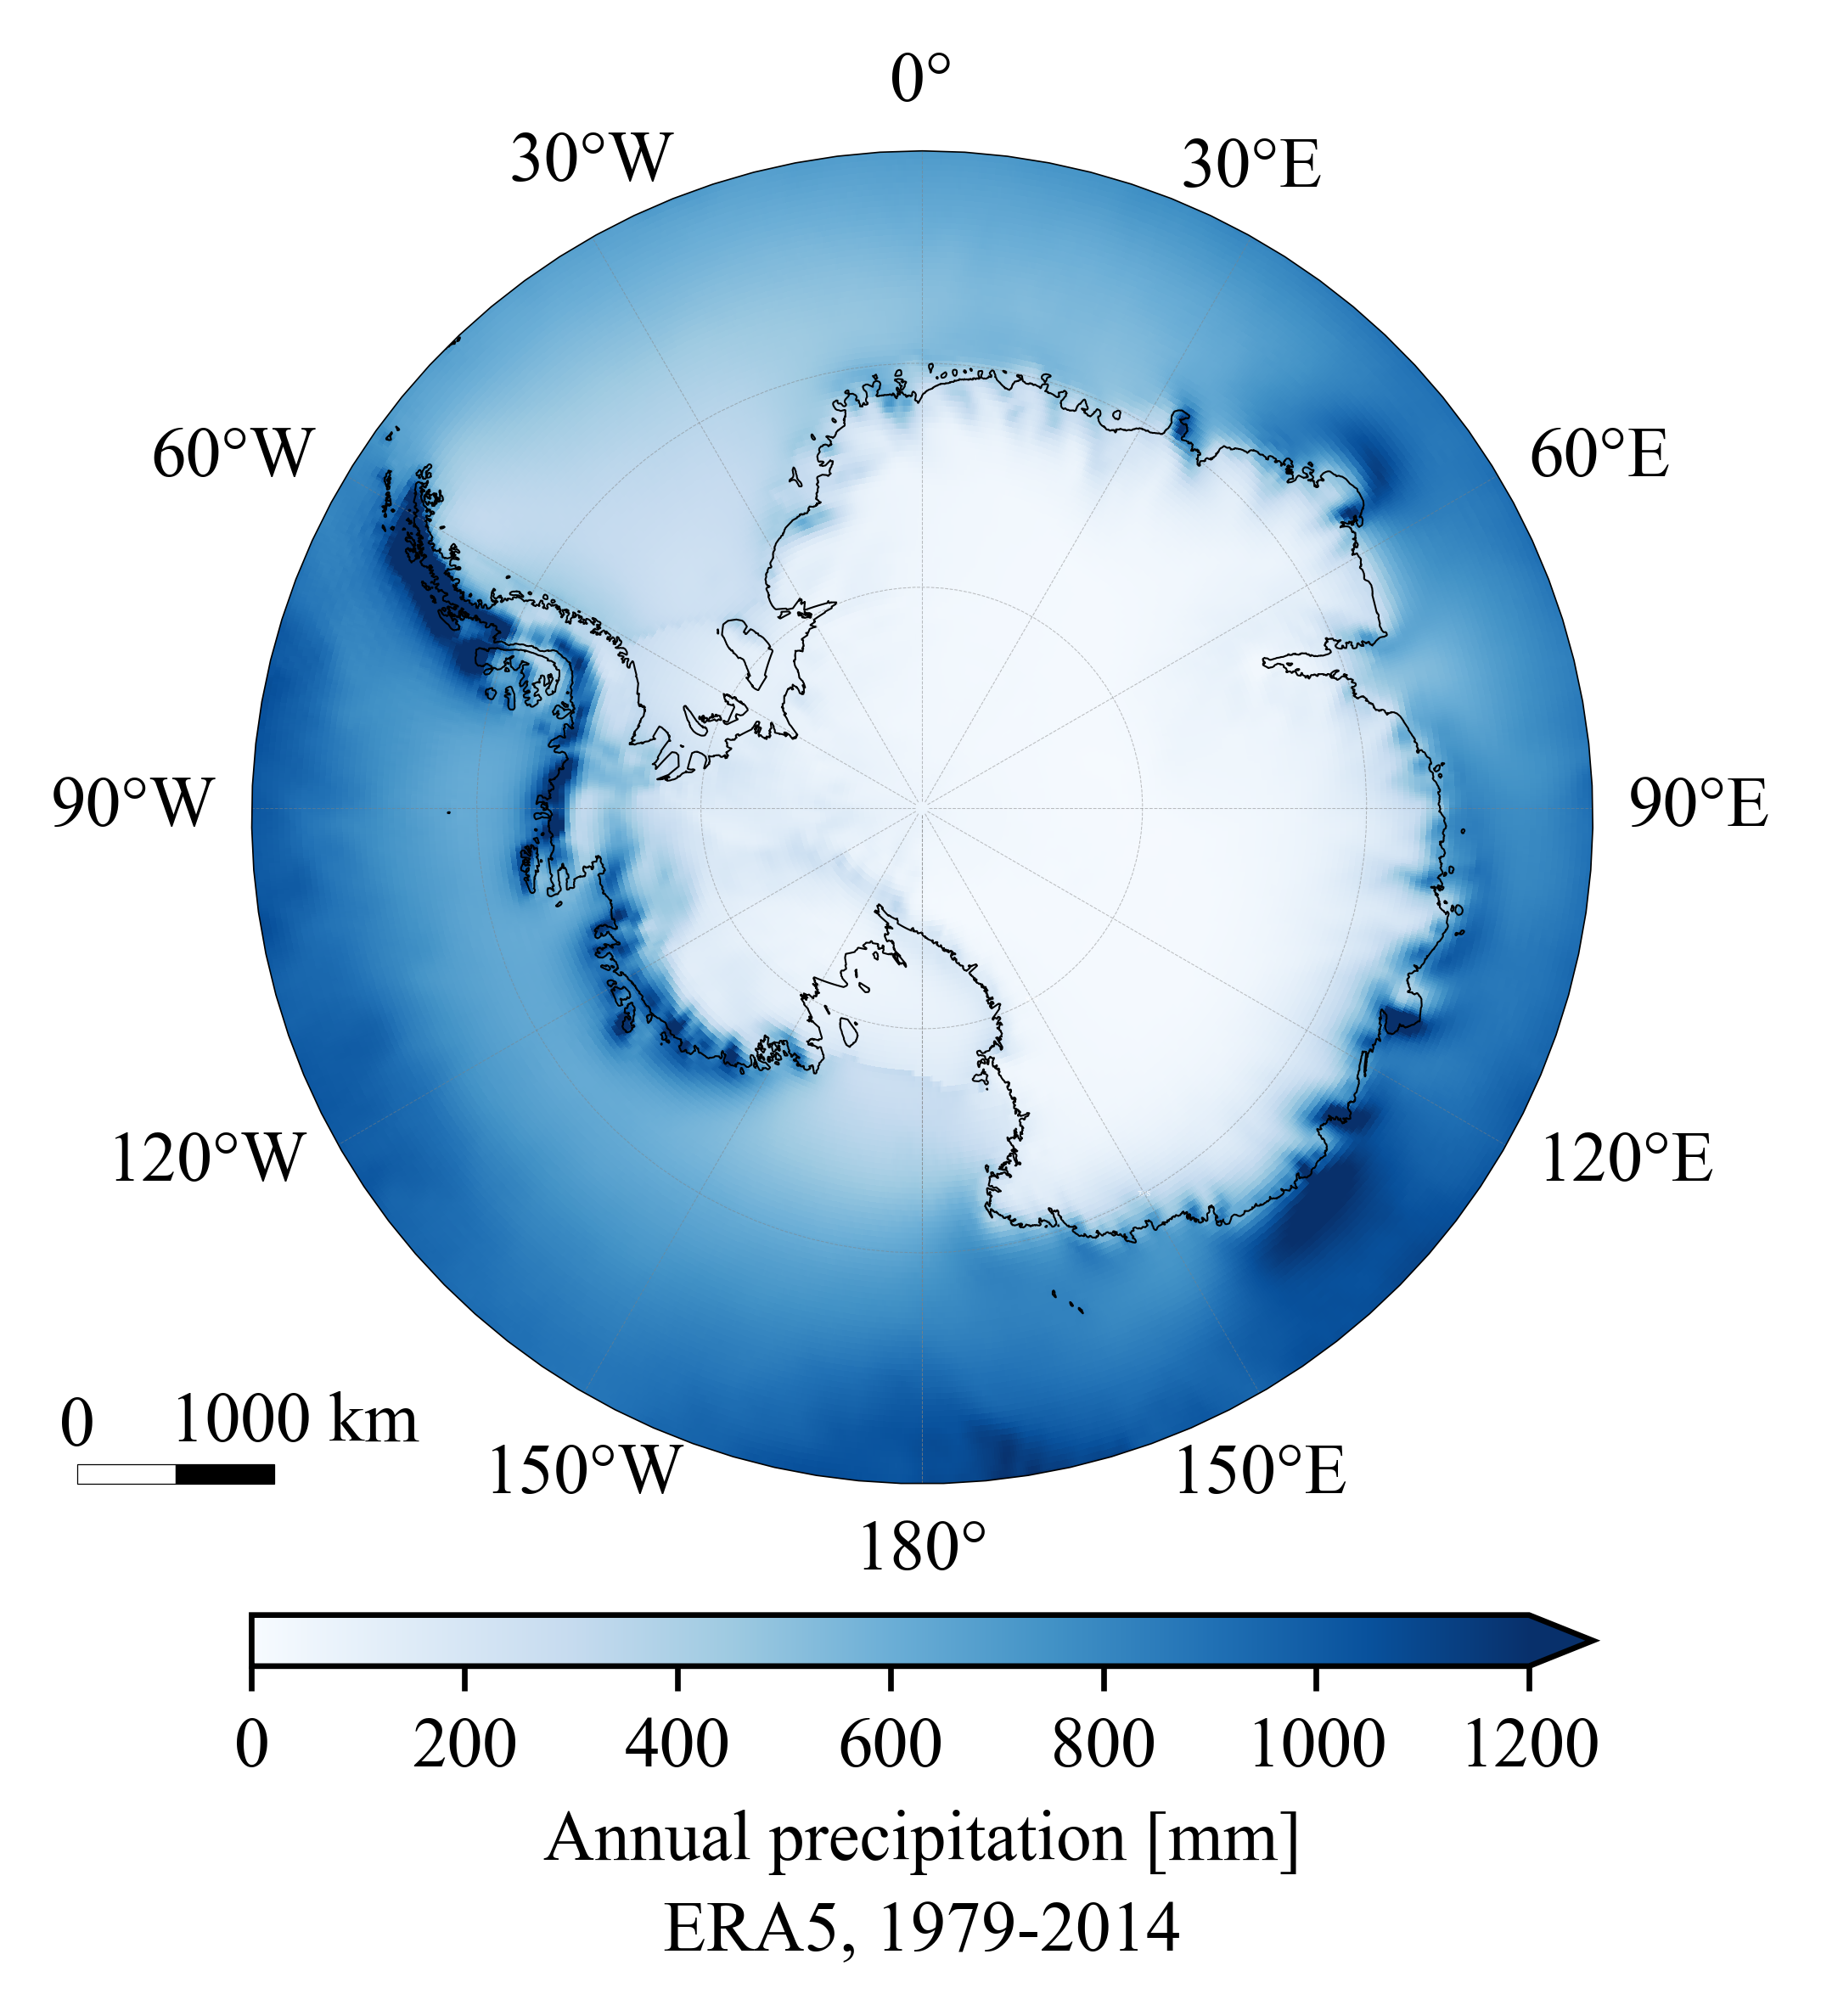

In [7]:
# SH map
pltlevel_sh = np.arange(0, 1200.01, 1)
pltticks_sh = np.arange(0, 1200.01, 200)
fig, ax = hemisphere_plot(northextent=-60, sb_length=1000, sb_barheight=100,)

plt_cmp = ax.pcolormesh(
    era5_mon_sl_79_21_pre.longitude,
    era5_mon_sl_79_21_pre.latitude,
    pre_ann_sum[:-1, :, :].mean(axis=0),
    norm=BoundaryNorm(pltlevel_sh, ncolors=len(pltlevel_sh), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel_sh)), rasterized=True,
    transform=ccrs.PlateCarree(),
)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08,
    fraction=0.07, shrink=1, aspect=25, anchor=(0.5, 1), panchor=(0.5, 0),
    ticks=pltticks_sh, extend='max')
cbar.ax.set_xlabel(
    'Annual precipitation [mm]\nERA5, 1979-2014', linespacing=1.5
)

# Difference in Annual pre HadGEM3-GC31-LL, historical, r1i1p1f3 - ERA5

In [8]:
am_pr_era5 = pre_ann_sum[:-1, :, :].mean(axis=0)
am_pr_hg3_ll_hi_r1
am_pr_era5


<xarray.DataArray (latitude: 721, longitude: 1440)>
array([[255.25757326, 255.25757326, 255.25757326, ..., 255.25757326,
        255.25757326, 255.25757326],
       [257.8306666 , 257.84932686, 257.85561967, ..., 257.82451723,
        257.82873475, 257.83885748],
       [254.481965  , 254.51678905, 254.53503451, ..., 254.44858773,
        254.44823254, 254.46511899],
       ...,
       [ 63.70038289,  63.69460227,  63.68223615, ...,  63.69829758,
         63.70038289,  63.70246821],
       [ 63.82798588,  63.81155091,  63.81155091, ...,  63.84415525,
         63.84422233,  63.84630764],
       [ 68.34646231,  68.34646231,  68.34646231, ...,  68.34646231,
         68.34646231,  68.34646231]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

In [11]:


# theta_3d_20100801_09z = xr.open_dataset(
#     'scratch/simulation/20100801_09_3d/02_lm_post_processed/theta_3d_20100801_09z.nc', chunks={'time': 1})
# lon = theta_3d_20100801_09z.lon.values
# lat = theta_3d_20100801_09z.lat.values
# target_grid = xe.util.grid_2d(
#     lon0_b=lon.min(), lon1_b=lon.max(), d_lon=0.01,
#     lat0_b=lat.min(), lat1_b=lat.max(), d_lat=0.01)
# regridder_theta = xe.Regridder(
#     theta_3d_20100801_09z, target_grid, 'bilinear', reuse_weights=True)
# theta = regridder_theta(theta_3d_20100801_09z.theta[ihours])
